In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import astropy.constants as c
import astropy.units as u
import sys
from scipy.interpolate import spline
from matplotlib.ticker import MultipleLocator
import cPickle
import seaborn as sns

sys.path.insert(0, '../')
from matplotlib.colors import LogNorm
from six.moves import cPickle as pickle

import pyathena as pa

unit = pa.set_units(muH=1.4271)
#print (unit['density'].cgs / 1.4271 / c.m_p.cgs, unit['velocity'], unit['length'])

# other units can be easily obtained
#print (unit['mass'], unit['time'], unit['magnetic_field'])

Msun = unit['mass'].to('Msun').value
print Msun
Myr=unit['time'].to('Myr').value



M_T_0 = []
M_T_1 = []
M_T_2 = []

simid_t = ('RPS_8pc_noICM_newacc','RPS_8pc_ICM0_newacc','RPS_8pc_ICM1_newacc','RPS_4pc_ICM1_newacc','RPS_8pc_ICM2_newacc','RPS_4pc_ICM2_newacc','RPS_8pc_ICM3_newacc','RPS_8pc_ICM4') # 'MHD_8pc_new' ,
labell = ('No ICM','Very Weak','Weak','Weak_4pc','Strong','Strong_4pc','Very Strong','ICM4') # r'No ICM',
labell = ('No ICM','P1', 'P3','P3h', 'P7','P7h','P14' ,'ICM1', 'ICM2', 'ICM3', 'ICM4')  # r'No ICM',
#C = ('k',(1,0.796,0.224),(1,0.506,0.035),(0.871,0.0,0.102),'deepskyblue','blue','navy')#('k','plum','orchid','purple','deepskyblue','royalblue','navy')#'lightgreen','forestgreen','darkgreen') #'darkkhaki','royalblue','firebrick'
C = ('k','lightsalmon','skyblue','salmon','crimson','deepskyblue','royalblue')
S = ('--','-','-','-','-','-','-')
#L = (1.5,1.5,1.5)
lw = (3,3,3,3,3,3,3)
alpha = (0.5,1,1,1,1,1,1)
# overplot Starformation rate of three different simulations
start = 250
stop = 499

ut = round(unit['time'].value,2)






0.0352682242985


0.0030731921299615057
0.00450861045759861
0.004143593611543539
0.0026240462081813616
0.0025160859906784446


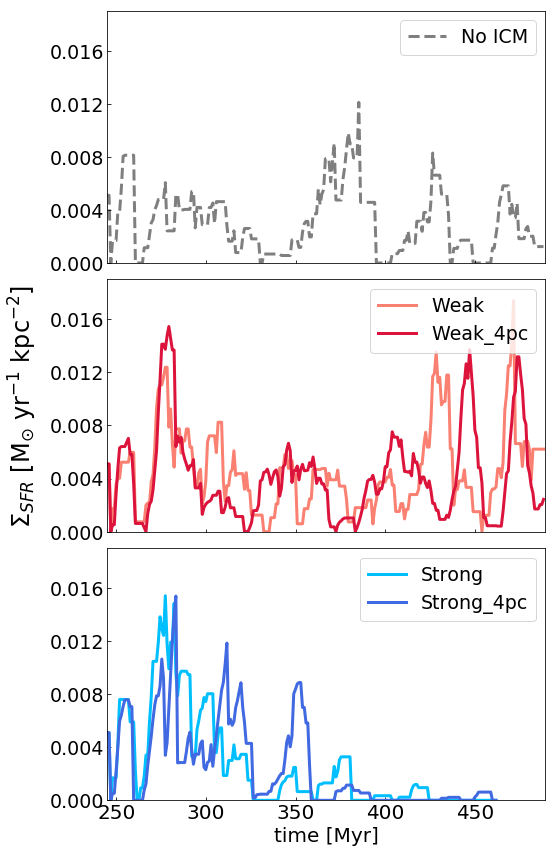

In [10]:
agebin = 10 # unit : Myr, 10 : H-alpha like, 40 : cluster lifetime
fig =plt.figure(figsize=(8.5,12))
for j in (0,3,4,5,6) :
    basedir = 'G:/yeongu/'
    simid = simid_t[j]
    Mj = []
    M_star_c = 0.0
    Mass_tot = []
    Mc = []
    SFE = []
    if j == 5 or j==6:
        stop = 472
    else:
        stop = 499
    xx = np.arange(start, stop)*ut
    for tidx in range(250, stop):
        vtkfname = '%s%s/id0/%s.%04d.vtk' % (basedir,simid, simid, tidx)


        starfname = vtkfname.replace('id0', 'starpar').replace('vtk', 'starpar.vtk')
        sp = pa.read_starvtk(starfname)

        star_clu = sp[sp['mass'] != 0]  # choose cluster, if choose 'mass' = 0, it means runaway star
        star_clu2 = star_clu[star_clu['age'] * Myr < agebin]

        M_star = sum(star_clu2['mass']) * Msun # SFR time variation
        M_star_c += sum(star_clu2['mass'])*Msun # mass sum in time scale / cumulative
        
        Mj.append(M_star* unit['time'].value / (1e+6*agebin*1.024*1.024)) #* unit['time'].value/ mass divided by time scale & area
        Mc.append(M_star_c* unit['time'].value / (1e+6*agebin*1.024*1.024)) #* unit['time'].value/ mass divided by time scale & area
    
    if j==0:
        k=1
    elif j==3 or j==4:
        k=2
    elif j==5 or j==6:
        k=3
        
    plt.subplot(3,1,k)

    
    plt.plot(xx, Mj, label='%s' % labell[j], color=C[j],linewidth=lw[j],alpha=alpha[j],ls=S[j])
    #plt.axhline(np.mean(Mj),ls='--')
    print np.mean(Mj)
    if j==5 or j==6:
        plt.xlabel(r'time [Myr]',fontsize=20)
        plt.xticks([250,300,350,400,450],fontsize=20)
    else :
        plt.xticks([250, 300, 350, 400, 450],[])
        
    plt.legend(loc=1,fontsize=19)      
    plt.yticks([0,0.004,0.008,0.012,0.016]) # For SFR
    plt.ylim(0, 0.019)
    plt.yticks(fontsize=19)
    plt.tick_params(direction='in')
    plt.xlim(xx.min(), 499 * ut)
  
ax = fig.add_subplot(111,frameon=False)
ax.tick_params(labelcolor='none', top='off', bottom='off', left='off', right='off')
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.patch.set_facecolor('None')
ax.set_ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]', fontsize=24,labelpad=45)
plt.tight_layout(pad=0.3)
#plt.savefig('D:/yeongu/plots/massflux_No12_2kpc.png',dpi=400) # ,transparent=True
#plt.savefig('D:/yeongu/plots/SFR_NO12_new.png',dpi=200)
plt.show()

499
(249L,) 249 (249L,)
1
499
(249L,) 249 (249L,)
2
472
(222L,) 222 (222L,)
3
499
(249L,) 249 (249L,)
4


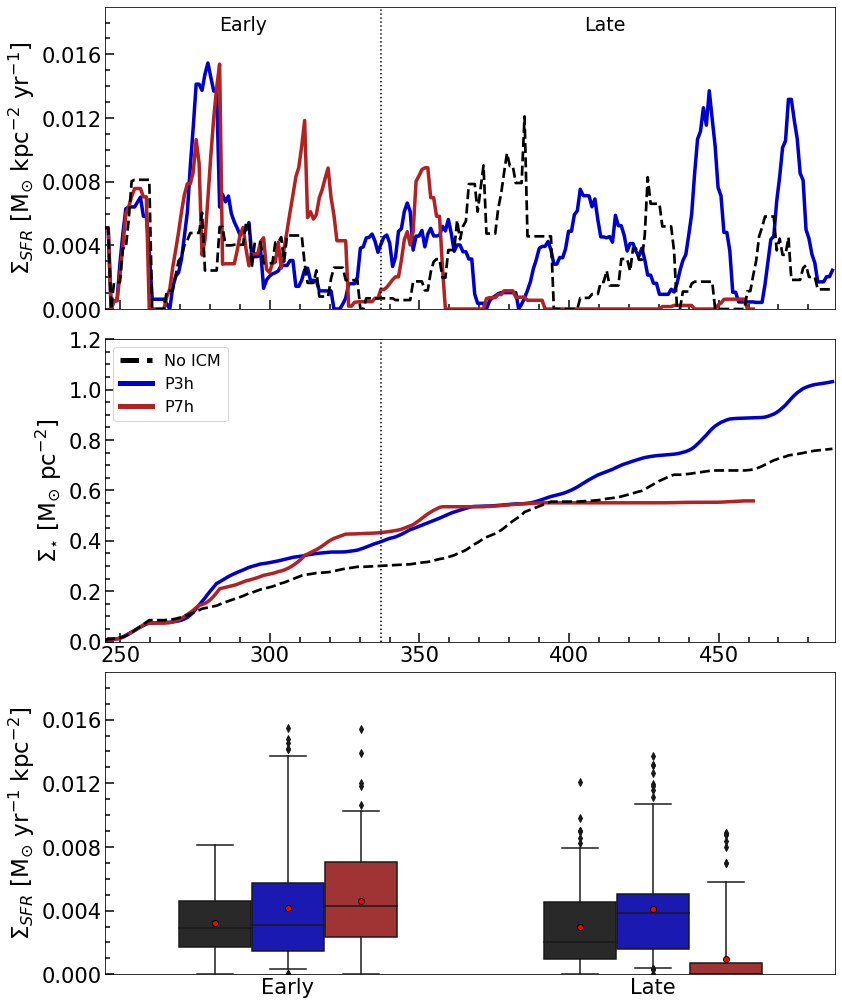

In [33]:
################# Box plot #############
k = 0
agebin = 10 # unit : Myr, 10 : H-alpha like, 40 : cluster lifetime
fig =plt.figure(figsize=(12,14))
ax = plt.subplot(111)
data = pd.DataFrame(columns=['Model','SFRs','Stage'])
crit = 94
ut = round(unit['time'].value, 2)
C = ('k', 'powderblue', 'dodgerblue','mediumblue' ,'salmon', 'firebrick','goldenrod')
C2 = ((0.16,0.16,0.16),'dodgerblue','mediumblue' ,'salmon', 'firebrick','goldenrod')
C2 = ((0.16,0.16,0.16),'mediumblue' , 'firebrick','goldenrod') # No, 3h, 7h
#C2 = ((0.16,0.16,0.16), 'powderblue', 'dodgerblue','salmon','goldenrod') # No, 1,3,7,14
lw = (2.7, 1.3, 2.4, 3.5, 2.4, 3.5, 1.3) # Previous
#lw = (2.7, 2.2, 2.2, 3.5, 2.2, 3.5, 2.2) # New
alpha = (1, 1, 1, 1, 1, 1, 1)
lo=(0,2,3,4,5,1)
for j in (0,3,5,0) :
    basedir = 'G:/yeongu/'
    simid = simid_t[j]
    Mj = []
    M_star_c = 0.0
    Mass_tot = []
    Mc = []
    SFE = []
    start=250
    if j==5 or j==6 or j==7:
        stop = 472
    else:
        stop = 499
    xx = np.arange(start, stop) * ut
    for tidx in range(start, stop):
        #print stop
        vtkfname = '%s%s/id0/%s.%04d.vtk' % (basedir,simid, simid, tidx)

        starfname = vtkfname.replace('id0', 'starpar').replace('vtk', 'starpar.vtk')
        sp = pa.read_starvtk(starfname)

        star_clu = sp[sp['mass'] != 0]  # choose cluster, if choose 'mass' = 0, it means runaway star
        star_clu2 = star_clu[star_clu['age'] * Myr < agebin]

        M_star = sum(star_clu2['mass']) * Msun # SFR time variation
        M_star_c += sum(star_clu2['mass'])*Msun # mass sum in time scale / cumulative
        
        Mj.append(M_star* unit['time'].value / (1e+6*agebin*1.024*1.024)) #* unit['time'].value/ mass divided by time scale & area
        Mc.append(M_star_c* unit['time'].value / (1e+6*agebin*1.024*1.024)) #* unit['time'].value/ mass divided by time scale & area
    
    #xx[xx < 367] = 'Early'
    #print len(Mj)
    
############ Early & Late ###############
    if j!=5 and j!=6 and j!=7:
        ee = np.array('Early')
        ee = np.repeat(ee,crit)
        ll = np.array('Late')
        ll = np.repeat(ll,249-crit)
        model = np.array('%s' % labell[j])
        model = np.repeat(model,249)
    else:
        ee = np.array('Early')
        ee = np.repeat(ee,crit)
        ll = np.array('Late')
        ll = np.repeat(ll,222-crit)
        model = np.array('%s' % labell[j])
        model = np.repeat(model,222)
    
    stage = np.concatenate((ee,ll),axis=None)
##########################################
    if k!=0:
        ax1 = plt.subplot(3, 1, 1)
        # plt.minorticks_on()
        ax1.tick_params(which='minor', direction='in',length=5,width=1.5)
        ax1.tick_params(which='major', direction='in', labelsize=21,length=9,width=1.5)
        plt.minorticks_on()
        plt.plot(xx, Mj, color=C[j], linewidth=lw[j], alpha=alpha[j], ls=S[j])
        
        if j==0:
            plt.text(283,0.0175,'Early',fontsize=19)
            plt.text(405,0.0175,'Late',fontsize=19)
            plt.axvline((250+94)*ut,c='k',ls=':')
        plt.xticks([250, 300, 350, 400, 450], [])
        # plt.plot(xx, SFE, label='%s' % labell[j], color=C[j], linestyle=S[j], linewidth=L[j], alpha=alpha[j])
        plt.xlim(xx.min(), 499 * ut)
        plt.ylim(0, 0.019)
        # plt.xlabel(r'time [Myr]', fontsize=14)
        # plt.ylabel(r'SFE',fontsize=17) # For SFE
        plt.ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ kpc$^{-2}$ yr$^{-1}$]', fontsize=23)  # For SFR
        # plt.title(r'SFR variation $(Agebin=%s)$' % agebin)
        # plt.yticks([0,0.005,0.01,0.015,0.02]) # For cumulative
        plt.yticks([0, 0.004, 0.008, 0.012, 0.016])  # For SFR

        ax2 = plt.subplot(3, 1, 2)
        plt.minorticks_on()
        ax2.tick_params(which='minor', direction='in',length=5,width=1.5)
        ax2.tick_params(which='major', direction='in', labelsize=21,length=9,width=1.5)
        plt.plot(xx, Mc, color=C[j], linewidth=lw[j], alpha=alpha[j], ls=S[j])
        plt.plot([],[],label='%s' % labell[j], color=C[j], linewidth=5, ls=S[j])
        if j==0:
            plt.axvline((250+94)*ut,c='k',ls=':')
        #k = k+1
        #plt.xlabel(r'Time [Myr]', fontsize=22)
        #plt.xticks([250, 300, 350, 400, 450], [])
        plt.ylabel(r'$\Sigma_{\star}$ [M$_{\odot}$ pc$^{-2}$]', fontsize=23)  # For cumulative
        plt.xlim(xx.min(), 499 * ut)
        plt.ylim(0, 1.2)  # For cumulative
        
        
    
    '''
############ 50 Myr interval #############
    if j!=6 and j!=7:
        f = np.array('0~50 Myr')
        f = np.repeat(f,50)
        ss = np.array('50~100 Myr')
        ss = np.repeat(ss,50)
        tt = np.array('100~150 Myr')
        tt = np.repeat(tt,50)
        ff = np.array('150~200 Myr')
        ff = np.repeat(ff,50)
        fff = np.array('200~250 Myr')
        fff = np.repeat(fff,49)
        model = np.array('%s' % labell[j])
        model = np.repeat(model,249)
    else:
        f = np.array('0~50 Myr')
        f = np.repeat(f,50)
        ss = np.array('50~100 Myr')
        ss = np.repeat(ss,50)
        tt = np.array('100~150 Myr')
        tt = np.repeat(tt,50)
        ff = np.array('150~200 Myr')
        ff = np.repeat(ff,50)
        fff = np.array('200~250 Myr')
        fff = np.repeat(fff,22)
        model = np.array('%s' % labell[j])
        model = np.repeat(model,222)
    
    stage = np.concatenate((f,ss,tt,ff,fff),axis=None)
############################################
    '''
    print stop
    #print aa
    print stage.shape, len(Mj),model.shape
    if k!=3:
        d = {'SFRs': Mj, 'Stage': stage, 'Model': model}
        df = pd.DataFrame(data=d)
        data=data.append(df)
    
    k = k + 1
    print k

#handles,labels = ax2.get_legend_handles_labels()
#handles = [handles[4], handles[0], handles[1], handles[2], handles[3]]
#labels = [labels[4], labels[0], labels[1], labels[2], labels[3]]    

handles,labels = ax2.get_legend_handles_labels()
handles = [handles[2], handles[0], handles[1]]
labels = [labels[2], labels[0], labels[1]]

ax2.legend(handles,labels,loc=0,fontsize=16)

plt.subplot(3,1,3)
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')
ax=sns.boxplot(x='Stage',y='SFRs',hue='Model',data=data,whis=[5,95],showmeans=True,meanprops=meanpointprops,palette=C2,width=0.6) # 0.98258[5,95]
#ax.set_yscale('log')
plt.minorticks_on()
ax.tick_params(axis='x',which='both',length=0,labelsize=21)
ax.tick_params(axis='y',which='minor', direction='in',length=5,width=1.5)
ax.tick_params(axis='y',which='major', direction='in', labelsize=21,length=9,width=1.5)
plt.xlabel('',fontsize=1)
plt.ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]',fontsize=23)
#plt.yticks([0,0.003,0.006,0.009,0.012,0.015,0.018],[0,0.003,0.006,0.009,0.012,0.015,0.018])
plt.ylim(0, 0.019)
plt.yticks([0, 0.004, 0.008, 0.012, 0.016])
#ax.legend(loc='upper left',fontsize=14,ncol=2)
ax.get_legend().remove()
plt.subplots_adjust(bottom=0.03, top=0.99, wspace=.01,right=0.975,left=0.13,hspace=0.1)
#plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.png',dpi=300) # ,transparent=True
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.eps',format='eps',dpi=300)
plt.savefig('D:/yeongu/plots/paperplot/new/SFR_3.png',dpi=300) # ,transparent=True
plt.savefig('D:/yeongu/plots/paperplot/new/SFR_3.eps',format='eps',dpi=300)
plt.show()

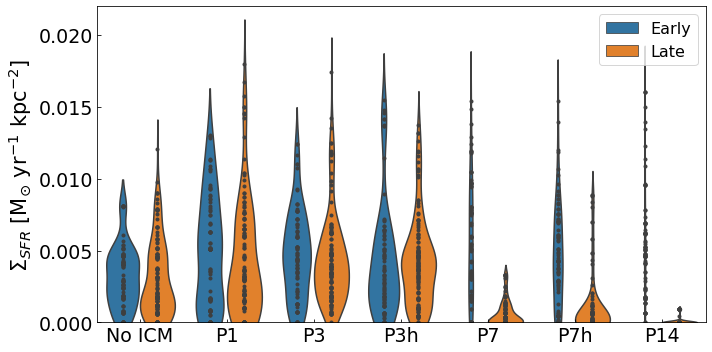

In [39]:
fig =plt.figure(figsize=(10,5))
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')
ax=sns.violinplot(x='Model',y='SFRs',hue='Stage',data=data,showmeans=True,meanprops=meanpointprops,inner='point',bw='silverman') # 0.98258[5,95] ,whis=1
#ax.set_yscale('log')
ax.tick_params(which='major',direction='in',labelsize=19)
ax.tick_params(which='minor', direction='in')
plt.xlabel('',fontsize=1)
plt.ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]',fontsize=21)
#plt.yticks([0,0.003,0.006,0.009,0.012,0.015,0.018],[0,0.003,0.006,0.009,0.012,0.015,0.018])
plt.ylim(0,0.022)
plt.legend(loc='upper right',fontsize=16)
plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.png',dpi=300) # ,transparent=True
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.eps',format='eps',dpi=300)
plt.show()

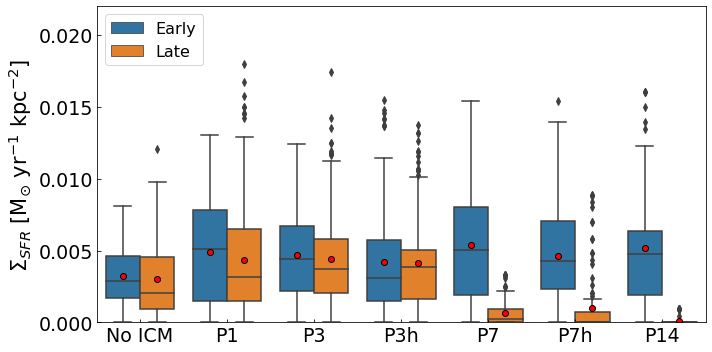

In [67]:
fig =plt.figure(figsize=(10,5))
#ax = sns.stripplot(x="Model", y="SFRs",hue='Stage', data=data, dodge=True,palette='Set2', jitter=True)
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')
ax=sns.boxplot(x='Model',y='SFRs',hue='Stage',data=data,whis=1.5,showmeans=True,meanprops=meanpointprops) # 0.98258[5,95]
#ax.set_yscale('log')
ax.tick_params(which='major',direction='in',labelsize=19)
ax.tick_params(which='minor', direction='in')
plt.xlabel('',fontsize=1)
plt.ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]',fontsize=21)
#plt.yticks([0,0.003,0.006,0.009,0.012,0.015,0.018],[0,0.003,0.006,0.009,0.012,0.015,0.018])
plt.ylim(0,0.022)
plt.legend(loc='upper left',fontsize=16)
plt.tight_layout()
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.png',dpi=300) # ,transparent=True
#plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.eps',format='eps',dpi=300)
plt.show()

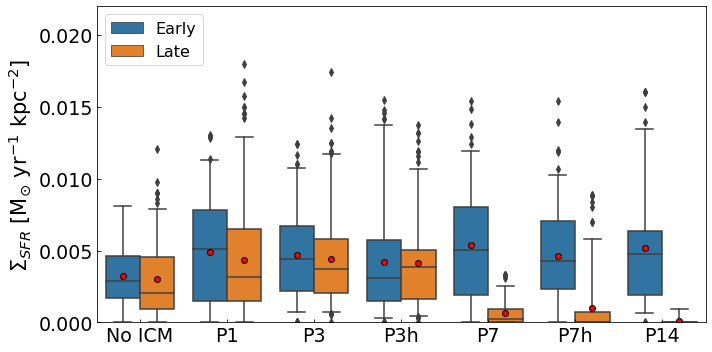

In [69]:
fig =plt.figure(figsize=(10,5))
#ax = sns.stripplot(x="Model", y="SFRs",hue='Stage', data=data, dodge=True,palette='Set2', jitter=True)
meanpointprops = dict(marker='o', markeredgecolor='black', markerfacecolor='red')
ax=sns.boxplot(x='Model',y='SFRs',hue='Stage',data=data,whis=[5,95],showmeans=True,meanprops=meanpointprops)#,bootstrap=1000) # 0.98258[5,95]
#ax.set_yscale('log')
ax.tick_params(which='major',direction='in',labelsize=19)
ax.tick_params(which='minor', direction='in')
plt.xlabel('',fontsize=1)
plt.ylabel(r'$\Sigma_{SFR}$ [M$_{\odot}$ yr$^{-1}$ kpc$^{-2}$]',fontsize=21)
#plt.yticks([0,0.003,0.006,0.009,0.012,0.015,0.018],[0,0.003,0.006,0.009,0.012,0.015,0.018])
plt.ylim(0,0.022)
plt.legend(loc='upper left',fontsize=16)
plt.tight_layout()
plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.png',dpi=300) # ,transparent=True
plt.savefig('D:/yeongu/plots/paperplot/new/SFR_boxplot.eps',format='eps',dpi=300)
plt.show()

In [9]:
rcl = 100 #pc
vrel = 500/3.086e13*3.151e7 # km/s
ncl = 5 #cm-3
nwind = 5e-3
x = ncl/nwind
tcc = rcl/vrel*x**0.5
print tcc

6194090.0408
